In [2]:
# Importing Relevant Libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import pylab
import collections
import pymongo
import psycopg2
import paho.mqtt.client as mqtt
import seaborn as sns
from IPython import display
from pandas import datetime
from datetime import timedelta
from pymongo import MongoClient
from scipy import stats

import plotly.graph_objects as go
import plotly as py

In [3]:
# Set up MongoDB Client
client_mqtt = mqtt.Client()

# Set up NodeMCU Client
client_mongo = MongoClient('192.168.1.5')
temp_database = client_mongo['temp_collect']
data=temp_database['temp_height_vary']

In [6]:
#Time : 2pm - 3pm , AC Temperature : 26, Date : 18/7/19
# we are trying to simulate a condition where the number of sensors are increased
def create_df(date_req, start_time, end_time, data, interval):
    """
    This function creates a dataframe containing all temperatures together for a particular time stamp
    """
    stamp = []
    tmp_1=[]
    tmp_2=[]
    tmp_3=[]
    
    #specifying every n'th minute
    n=interval
    #counter
    c=0
    # for the first collection
    required_date =  datetime.strptime(date_req,'%m/%d/%Y')
    required_start_time = datetime.strptime(start_time,'%H:%M')
        
    required_end_time = datetime.strptime(end_time,'%H:%M')
    high1 = 0
    low1 = 324234 
    high2 = 0
    low2 = 234324 
    for obj in data.find():
        time_h=(obj['Date-Time'])
        stamp_a = time_h.split()[0] + " " + time_h.split()[1]
        date = datetime.strptime(time_h.split()[0],'%m/%d/%Y')
        
        time = datetime.strptime(time_h.split()[1],'%H:%M')

        if(date == required_date and time >=  required_start_time and time <=  required_end_time):
            if(c==n):
                stamp.append(stamp_a)
                tmp_1.append(float(obj['tmp_1'])) 
                tmp_2.append(float(obj['tmp_2'])) 
                tmp_3.append(float(obj['tmp_3'])) 
                c=0
            c=c+1
    d_1 = {'Stamp':stamp,'Temp_1':tmp_1,'Temp_2':tmp_2,'Temp_3':tmp_3}
    data_time_1=pd.DataFrame(d_1)

    return data_time_1



In [8]:
data = create_df("07/26/2019", "16:25" , "18:40",data,1)

In [9]:
data

,Stamp,Temp_1,Temp_2,Temp_3
0,07/26/2019 16:26,24.813,24.875,25.438
1,07/26/2019 16:27,25.500,25.000,25.687
2,07/26/2019 16:28,25.625,25.250,25.312
3,07/26/2019 16:29,25.125,25.562,25.438
4,07/26/2019 16:31,25.312,25.625,25.500
5,07/26/2019 16:32,25.375,25.875,25.750
6,07/26/2019 16:33,25.937,26.000,26.437
7,07/26/2019 16:34,25.687,26.063,26.000
8,07/26/2019 16:35,25.937,25.812,26.375
9,07/26/2019 16:36,25.187,25.750,25.750


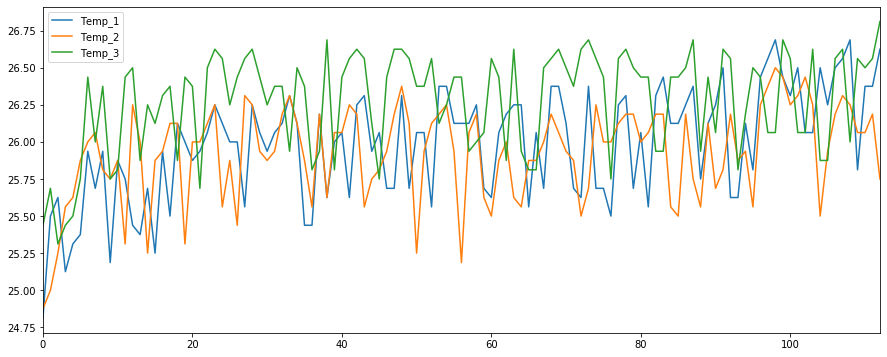

In [10]:
# remove 
data.plot(figsize=(15, 6))
plt.show()

In [13]:
from scipy.stats.stats import pearsonr 
# print("Correlation between temp_1 and temp_2")
# print (pearsonr(data['Temp_1'], data['Temp_2']))
# print("Correlation between temp_2 and temp_3")
# print (pearsonr(data['Temp_2'], data['Temp_3']))
data.corr()

,Temp_1,Temp_2,Temp_3
Temp_1,1.000000,0.380829,0.324769
Temp_2,0.380829,1.000000,0.256718
Temp_3,0.324769,0.256718,1.000000
